# Agenda
* Numpy basics
* Pandas basics
* Pandas Practical EDA
* Lab


# Introduction


## Download this notebook for our code-along:

From our class GitHub repository "notebooks" directory, download the file "02_numpy_and_pandas.ipynb".  Move this to a convenient place where you are grouping your class related materials.


# Introduction to Numpy ("num-pi")

* Overview
* ndarray
* Indexing and Slicing

More info: [http://wiki.scipy.org/Tentative_NumPy_Tutorial](http://wiki.scipy.org/Tentative_NumPy_Tutorial)


## Numpy Overview

* Why use the Numpy package for Data?
    * It makes our data science life easier!!
        * Numpy brings *decades* of C math into Python!
        * Numpy provides a wrapper for extensive C/C++/Fortran codebases, used for data analysis functionality
        * NDAarray allows easy vectorized math and broadcasting (i.e. functions for vector elements of different shapes)

In [1]:
## from numpy import * #Load all the numpy packages
%matplotlib inline
import numpy as np



### Creating ndarrays

An array object represents a multidimensional, homogeneous array of fixed-size items. 

In [2]:
# Creating arrays
a = np.zeros((3))
b = np.ones((2,3))
c = np.random.randint(1,10,(2,3,4))
d = np.arange(0,11,1)

What are these functions?

    arange?

In [3]:
# Note the way each array is printed:
print("a: ",a)
print("b: ",b)
print("c: ",c)
print("d: ",d)

('a: ', array([0., 0., 0.]))
('b: ', array([[1., 1., 1.],
       [1., 1., 1.]]))
('c: ', array([[[5, 6, 5, 1],
        [8, 3, 6, 2],
        [7, 4, 4, 7]],

       [[1, 7, 4, 8],
        [5, 6, 6, 1],
        [4, 4, 2, 6]]]))
('d: ', array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))


In [4]:
## Arithmetic in arrays is element wise

In [5]:
>>> a = np.array( [20,30,40,50] )
>>> b = np.arange( 4 )
>>> b

array([0, 1, 2, 3])

In [6]:
>>> c = a-b
>>> c

array([20, 29, 38, 47])

In [7]:
>>> b**2

array([0, 1, 4, 9])

## Indexing, Slicing and Iterating

In [8]:
# one-dimensional arrays work like lists:
a = np.arange(10)**2

In [9]:
a

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [10]:
a[2:5]

array([ 4,  9, 16])

In [11]:
# Multidimensional arrays use tuples with commas for indexing
# with (row,column) conventions beginning, as always in Python, from 0

In [12]:
b = np.random.randint(1,100,(4,4))

In [13]:
b

array([[ 2, 38, 38,  9],
       [32, 21, 28, 25],
       [19, 23, 21, 89],
       [84, 59, 80, 62]])

In [14]:
# Guess the output
print(b[2,3])


89


In [15]:
# Guess the output
print(b[0,0])


2


In [16]:
# Guess the output
b[0:3,1]

array([38, 21, 23])

In [17]:
#Guess the output
b[:,1]

array([38, 21, 23, 59])

In [18]:
#Guess the output
b[1:3,:]

array([[32, 21, 28, 25],
       [19, 23, 21, 89]])

# Introduction to Pandas

**Pandas, Know it! Love it! We will use it extensively.**

Will allow us to use short lines of code to do important manipulation and viewing of our data
* Object Creation
* Viewing data
* Selection
* Missing data
* Grouping
* Reshaping
* Time series
* Plotting
* i/o
 

_pandas.pydata.org_

## Pandas Overview


In [42]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
# create some data
# create dates and view them
dates = pd.date_range('20140101',periods=6)
dates

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06'],
              dtype='datetime64[ns]', freq='D')

In [87]:
# create a dataframe with random numbers and a column list labeled ABCD.
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
df

,A,B,C,D
2014-01-01,0.359989,0.567581,0.353239,-1.272666
2014-01-02,0.626389,-0.388070,0.137835,-0.719815
2014-01-03,0.548593,-2.170293,0.841466,1.246237
2014-01-04,0.132996,-1.226431,0.740254,-0.920215
2014-01-05,0.345092,0.289317,-1.830973,-0.860627
2014-01-06,-0.415543,-1.603998,-0.447243,-0.927132


In [88]:
# Index, columns, underlying numpy data
z = pd.DataFrame(index = df.index, columns = df.columns)
df.columns

Index([u'A', u'B', u'C', u'D'], dtype='object')

In [89]:
df

,A,B,C,D
2014-01-01,0.359989,0.567581,0.353239,-1.272666
2014-01-02,0.626389,-0.388070,0.137835,-0.719815
2014-01-03,0.548593,-2.170293,0.841466,1.246237
2014-01-04,0.132996,-1.226431,0.740254,-0.920215
2014-01-05,0.345092,0.289317,-1.830973,-0.860627
2014-01-06,-0.415543,-1.603998,-0.447243,-0.927132


In [90]:
## T for transposing the data
df.T


,2014-01-01 00:00:00,2014-01-02 00:00:00,2014-01-03 00:00:00,2014-01-04 00:00:00,2014-01-05 00:00:00,2014-01-06 00:00:00
A,0.359989,0.626389,0.548593,0.132996,0.345092,-0.415543
B,0.567581,-0.388070,-2.170293,-1.226431,0.289317,-1.603998
C,0.353239,0.137835,0.841466,0.740254,-1.830973,-0.447243
D,-1.272666,-0.719815,1.246237,-0.920215,-0.860627,-0.927132


In [91]:
## notice it does not stick
df

,A,B,C,D
2014-01-01,0.359989,0.567581,0.353239,-1.272666
2014-01-02,0.626389,-0.388070,0.137835,-0.719815
2014-01-03,0.548593,-2.170293,0.841466,1.246237
2014-01-04,0.132996,-1.226431,0.740254,-0.920215
2014-01-05,0.345092,0.289317,-1.830973,-0.860627
2014-01-06,-0.415543,-1.603998,-0.447243,-0.927132


In [92]:
# add it to an object
temp = df.T
temp

,2014-01-01 00:00:00,2014-01-02 00:00:00,2014-01-03 00:00:00,2014-01-04 00:00:00,2014-01-05 00:00:00,2014-01-06 00:00:00
A,0.359989,0.626389,0.548593,0.132996,0.345092,-0.415543
B,0.567581,-0.388070,-2.170293,-1.226431,0.289317,-1.603998
C,0.353239,0.137835,0.841466,0.740254,-1.830973,-0.447243
D,-1.272666,-0.719815,1.246237,-0.920215,-0.860627,-0.927132


In [93]:
# With specific dtypes
temp.dtypes

2014-01-01    float64
2014-01-02    float64
2014-01-03    float64
2014-01-04    float64
2014-01-05    float64
2014-01-06    float64
Freq: D, dtype: object

In [94]:
z = df.sort_values(by='B')
z


,A,B,C,D
2014-01-03,0.548593,-2.170293,0.841466,1.246237
2014-01-06,-0.415543,-1.603998,-0.447243,-0.927132
2014-01-04,0.132996,-1.226431,0.740254,-0.920215
2014-01-02,0.626389,-0.388070,0.137835,-0.719815
2014-01-05,0.345092,0.289317,-1.830973,-0.860627
2014-01-01,0.359989,0.567581,0.353239,-1.272666


In [95]:
# make a second set of data from scratch
df2 = pd.DataFrame({ 'A' : 1.,
                         'B' : pd.Timestamp('20130102'),
                         'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                         'D' : np.array([3] * 4,dtype='int32'),
                         'E' : 'foo' })
    

df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,3,foo
1,1.0,2013-01-02,1.0,3,foo
2,1.0,2013-01-02,1.0,3,foo
3,1.0,2013-01-02,1.0,3,foo


#### Viewing Data

In [96]:
df

,A,B,C,D
2014-01-01,0.359989,0.567581,0.353239,-1.272666
2014-01-02,0.626389,-0.388070,0.137835,-0.719815
2014-01-03,0.548593,-2.170293,0.841466,1.246237
2014-01-04,0.132996,-1.226431,0.740254,-0.920215
2014-01-05,0.345092,0.289317,-1.830973,-0.860627
2014-01-06,-0.415543,-1.603998,-0.447243,-0.927132


In [57]:
df.head()


,A,B,C,D
2014-01-01,0.056531,0.150625,0.473350,0.758157
2014-01-02,1.129861,0.662271,-0.384764,-0.932181
2014-01-03,0.764072,0.161682,-0.963130,0.852634
2014-01-04,-0.725922,1.187163,-0.602349,0.594336
2014-01-05,0.346188,-0.236771,-0.591140,0.168473


In [58]:
df.tail(3)

,A,B,C,D
2014-01-04,-0.725922,1.187163,-0.602349,0.594336
2014-01-05,0.346188,-0.236771,-0.591140,0.168473
2014-01-06,0.079653,-1.608972,-0.715261,-0.115534


In [59]:
df.index

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06'],
              dtype='datetime64[ns]', freq='D')

In [60]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.275064,0.052666,-0.463882,0.220981
std,0.642305,0.951315,0.496482,0.674199
min,-0.725922,-1.608972,-0.963130,-0.932181
25%,0.062311,-0.139922,-0.687033,-0.044532
50%,0.212920,0.156154,-0.596745,0.381404
75%,0.659601,0.537124,-0.436358,0.717202
max,1.129861,1.187163,0.473350,0.852634


In [61]:
df

,A,B,C,D
2014-01-01,0.056531,0.150625,0.473350,0.758157
2014-01-02,1.129861,0.662271,-0.384764,-0.932181
2014-01-03,0.764072,0.161682,-0.963130,0.852634
2014-01-04,-0.725922,1.187163,-0.602349,0.594336
2014-01-05,0.346188,-0.236771,-0.591140,0.168473
2014-01-06,0.079653,-1.608972,-0.715261,-0.115534


### Selection

In [62]:
df[['A','B']]

,A,B
2014-01-01,0.056531,0.150625
2014-01-02,1.129861,0.662271
2014-01-03,0.764072,0.161682
2014-01-04,-0.725922,1.187163
2014-01-05,0.346188,-0.236771
2014-01-06,0.079653,-1.608972


In [63]:
df[0:3]

,A,B,C,D
2014-01-01,0.056531,0.150625,0.473350,0.758157
2014-01-02,1.129861,0.662271,-0.384764,-0.932181
2014-01-03,0.764072,0.161682,-0.963130,0.852634


In [64]:
# By label
df.loc[dates[0]]

A    0.056531
B    0.150625
C    0.473350
D    0.758157
Name: 2014-01-01 00:00:00, dtype: float64

In [65]:
# multi-axis by label
df.loc[:,['A','B']]

,A,B
2014-01-01,0.056531,0.150625
2014-01-02,1.129861,0.662271
2014-01-03,0.764072,0.161682
2014-01-04,-0.725922,1.187163
2014-01-05,0.346188,-0.236771
2014-01-06,0.079653,-1.608972


In [66]:
# Date Range
df.loc['20140102':'20140104',['B']]

,B
2014-01-02,0.662271
2014-01-03,0.161682
2014-01-04,1.187163


In [67]:
# Fast access to scalar
df.at[dates[1],'B']

0.6622706980449068

### Operations

In [68]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.275064,0.052666,-0.463882,0.220981
std,0.642305,0.951315,0.496482,0.674199
min,-0.725922,-1.608972,-0.963130,-0.932181
25%,0.062311,-0.139922,-0.687033,-0.044532
50%,0.212920,0.156154,-0.596745,0.381404
75%,0.659601,0.537124,-0.436358,0.717202
max,1.129861,1.187163,0.473350,0.852634


In [69]:
df.mean(),df.mean(1) # Operation on two different axes
# there are pandas' methods for min, max etc. as well

(A    0.275064
 B    0.052666
 C   -0.463882
 D    0.220981
 dtype: float64, 2014-01-01    0.359666
 2014-01-02    0.118797
 2014-01-03    0.203815
 2014-01-04    0.113307
 2014-01-05   -0.078312
 2014-01-06   -0.590029
 Freq: D, dtype: float64)

### Boolean Indexing

In [70]:
df

,A,B,C,D
2014-01-01,0.056531,0.150625,0.473350,0.758157
2014-01-02,1.129861,0.662271,-0.384764,-0.932181
2014-01-03,0.764072,0.161682,-0.963130,0.852634
2014-01-04,-0.725922,1.187163,-0.602349,0.594336
2014-01-05,0.346188,-0.236771,-0.591140,0.168473
2014-01-06,0.079653,-1.608972,-0.715261,-0.115534


In [71]:
df[df.A < 0] # Basically a 'where' operation

,A,B,C,D
2014-01-04,-0.725922,1.187163,-0.602349,0.594336


In [72]:
df.A < 0

2014-01-01    False
2014-01-02    False
2014-01-03    False
2014-01-04     True
2014-01-05    False
2014-01-06    False
Freq: D, Name: A, dtype: bool

In [73]:
# Two conditions added together
df[(df.A < 0) & (df.B > .5) ]

,A,B,C,D
2014-01-04,-0.725922,1.187163,-0.602349,0.594336


In [74]:
# Two conditions ORed together
df[(df.A < -1) | (df.D > 0)]

,A,B,C,D
2014-01-01,0.056531,0.150625,0.473350,0.758157
2014-01-03,0.764072,0.161682,-0.963130,0.852634
2014-01-04,-0.725922,1.187163,-0.602349,0.594336
2014-01-05,0.346188,-0.236771,-0.591140,0.168473


### Merge

In [75]:
np.random.randn(10,4)

array([[-0.40171023, -1.15225112, -0.95796108, -0.90179107],
       [ 0.16471559, -1.18536366, -1.72007566, -0.8870741 ],
       [-0.13989662, -0.58790301, -1.12314579, -0.10310838],
       [ 0.85623273,  0.67972993,  0.10349897, -0.15770361],
       [ 1.07019798,  0.68838497,  1.73795321,  0.97944472],
       [-1.23797099, -0.49797716, -1.3897821 ,  1.09241831],
       [ 0.67180577, -1.797462  ,  1.7076194 ,  0.16282366],
       [ 0.18002513,  0.46169602, -0.36557472,  0.71942257],
       [-1.01871221,  0.77872479, -0.3423397 , -0.80018299],
       [ 1.09141119,  0.76191101, -0.4688139 ,  0.10599729]])

In [76]:
##Concatenating pandas objects together
# create a dataframe to use as an example
df2 = pd.DataFrame(np.random.randn(10,4))
df2

,0,1,2,3
0,2.206226,-0.803619,-2.473608,0.254696
1,-1.014819,1.002042,1.378120,-1.195118
2,0.786331,0.033647,-1.751141,-0.709476
3,2.910909,-0.706942,1.149226,0.707031
4,0.496538,0.145113,0.551645,0.810946
5,1.292492,0.270021,1.027346,-0.995257
6,-0.118988,-1.281172,-1.179376,1.466464
7,0.495948,0.953387,-0.127907,0.187795
8,0.097325,2.029578,0.725131,3.092520
9,-0.021990,-0.069421,0.955398,-0.234788


In [77]:
# Break it into pieces
pieces = [df2[:3], df2[3:7],df2[7:]]
pieces

[          0         1         2         3
 0  2.206226 -0.803619 -2.473608  0.254696
 1 -1.014819  1.002042  1.378120 -1.195118
 2  0.786331  0.033647 -1.751141 -0.709476,
           0         1         2         3
 3  2.910909 -0.706942  1.149226  0.707031
 4  0.496538  0.145113  0.551645  0.810946
 5  1.292492  0.270021  1.027346 -0.995257
 6 -0.118988 -1.281172 -1.179376  1.466464,
           0         1         2         3
 7  0.495948  0.953387 -0.127907  0.187795
 8  0.097325  2.029578  0.725131  3.092520
 9 -0.021990 -0.069421  0.955398 -0.234788]

In [78]:
pd.concat(pieces)

,0,1,2,3
0,2.206226,-0.803619,-2.473608,0.254696
1,-1.014819,1.002042,1.378120,-1.195118
2,0.786331,0.033647,-1.751141,-0.709476
3,2.910909,-0.706942,1.149226,0.707031
4,0.496538,0.145113,0.551645,0.810946
5,1.292492,0.270021,1.027346,-0.995257
6,-0.118988,-1.281172,-1.179376,1.466464
7,0.495948,0.953387,-0.127907,0.187795
8,0.097325,2.029578,0.725131,3.092520
9,-0.021990,-0.069421,0.955398,-0.234788


In [79]:
# Also can "Join" and "Append"

### Setting

In [80]:
df_posA = df.copy() # Without "copy" it would act on the dataset

df_posA[df_posA.A < 0] = -1*df_posA

In [81]:
df_posA

,A,B,C,D
2014-01-01,0.056531,0.150625,0.473350,0.758157
2014-01-02,1.129861,0.662271,-0.384764,-0.932181
2014-01-03,0.764072,0.161682,-0.963130,0.852634
2014-01-04,0.725922,-1.187163,0.602349,-0.594336
2014-01-05,0.346188,-0.236771,-0.591140,0.168473
2014-01-06,0.079653,-1.608972,-0.715261,-0.115534


In [82]:
#Setting new column aligns data by index
s1 = pd.Series([1,2,3,4,5,6],index=pd.date_range('20140102',periods=6))

In [83]:
s1

2014-01-02    1
2014-01-03    2
2014-01-04    3
2014-01-05    4
2014-01-06    5
2014-01-07    6
Freq: D, dtype: int64

In [84]:
df['F'] = s1

In [85]:
df

,A,B,C,D,F
2014-01-01,0.056531,0.150625,0.473350,0.758157,NaN
2014-01-02,1.129861,0.662271,-0.384764,-0.932181,1.0
2014-01-03,0.764072,0.161682,-0.963130,0.852634,2.0
2014-01-04,-0.725922,1.187163,-0.602349,0.594336,3.0
2014-01-05,0.346188,-0.236771,-0.591140,0.168473,4.0
2014-01-06,0.079653,-1.608972,-0.715261,-0.115534,5.0


### Missing Data

In [98]:
# Add a column with missing data
df1 = df.reindex(index=dates[0:4],columns=list(df.columns) + ['E'])

In [99]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [100]:
df1

,A,B,C,D,E
2014-01-01,0.359989,0.567581,0.353239,-1.272666,1.0
2014-01-02,0.626389,-0.388070,0.137835,-0.719815,1.0
2014-01-03,0.548593,-2.170293,0.841466,1.246237,NaN
2014-01-04,0.132996,-1.226431,0.740254,-0.920215,NaN


In [101]:
# find where values are null
pd.isnull(df1)

,A,B,C,D,E
2014-01-01,False,False,False,False,False
2014-01-02,False,False,False,False,False
2014-01-03,False,False,False,False,True
2014-01-04,False,False,False,False,True


### Applying functions

In [102]:
df

,A,B,C,D
2014-01-01,0.359989,0.567581,0.353239,-1.272666
2014-01-02,0.626389,-0.388070,0.137835,-0.719815
2014-01-03,0.548593,-2.170293,0.841466,1.246237
2014-01-04,0.132996,-1.226431,0.740254,-0.920215
2014-01-05,0.345092,0.289317,-1.830973,-0.860627
2014-01-06,-0.415543,-1.603998,-0.447243,-0.927132


In [103]:
df.apply(np.cumsum)

,A,B,C,D
2014-01-01,0.359989,0.567581,0.353239,-1.272666
2014-01-02,0.986378,0.179512,0.491073,-1.992481
2014-01-03,1.534971,-1.990781,1.332539,-0.746244
2014-01-04,1.667968,-3.217212,2.072793,-1.666460
2014-01-05,2.013060,-2.927895,0.241820,-2.527086
2014-01-06,1.597517,-4.531892,-0.205423,-3.454218


In [104]:
df.apply(lambda x: x.max() - x.min())

A    1.041932
B    2.737874
C    2.672439
D    2.518903
dtype: float64

In [105]:
# Built in string methods
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### Grouping


In [106]:
df3 = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                       'foo', 'bar', 'foo', 'foo'],
                       'B' : ['one', 'one', 'two', 'three',
                             'two', 'two', 'one', 'three'],
                       'C' : np.random.randn(8),
                       'D' : np.random.randn(8)})

In [107]:
df3

,A,B,C,D
0,foo,one,-1.096404,0.548185
1,bar,one,0.327829,0.755387
2,foo,two,-0.657810,-0.094670
3,bar,three,-0.400107,0.049381
4,foo,two,-0.407279,1.136338
5,bar,two,1.447911,0.138294
6,foo,one,0.108925,-0.666840
7,foo,three,-0.577794,1.443220


In [108]:
df3.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.327829  0.755387
    three -0.400107  0.049381
    two    1.447911  0.138294
foo one   -0.987479 -0.118655
    three -0.577794  1.443220
    two   -1.065089  1.041668

### Reshaping

In [109]:
# You can also stack or unstack levels

In [110]:
a = df3.groupby(['A','B']).sum()

In [111]:
# Pivot Tables
# pd.pivot_table(df3,values=['C','D'],rows=['A'],cols=['B'])

### Time Series


In [112]:
import pandas as pd
import numpy as np

In [113]:
# 100 Seconds starting on January 1st
rng = pd.date_range('1/1/2014', periods=100, freq='S')

In [114]:
# Give each second a random value
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [115]:
ts

2014-01-01 00:00:00    474
2014-01-01 00:00:01    347
2014-01-01 00:00:02    155
2014-01-01 00:00:03    150
2014-01-01 00:00:04    117
2014-01-01 00:00:05    300
2014-01-01 00:00:06    278
2014-01-01 00:00:07    102
2014-01-01 00:00:08    381
2014-01-01 00:00:09    226
2014-01-01 00:00:10    200
2014-01-01 00:00:11    244
2014-01-01 00:00:12    222
2014-01-01 00:00:13     14
2014-01-01 00:00:14     39
2014-01-01 00:00:15     93
2014-01-01 00:00:16     34
2014-01-01 00:00:17    468
2014-01-01 00:00:18    462
2014-01-01 00:00:19    445
2014-01-01 00:00:20     23
2014-01-01 00:00:21     23
2014-01-01 00:00:22    157
2014-01-01 00:00:23     25
2014-01-01 00:00:24    356
2014-01-01 00:00:25     32
2014-01-01 00:00:26    199
2014-01-01 00:00:27     18
2014-01-01 00:00:28    343
2014-01-01 00:00:29    399
                      ... 
2014-01-01 00:01:10    252
2014-01-01 00:01:11    103
2014-01-01 00:01:12    491
2014-01-01 00:01:13    160
2014-01-01 00:01:14    179
2014-01-01 00:01:15    458
2

In [116]:
# Built in resampling
ts.resample('1Min',how='mean') # Resample secondly to 1Minutely

C:\Users\Matth\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  


2014-01-01 00:00:00    235.716667
2014-01-01 00:01:00    238.800000
Freq: T, dtype: float64

In [117]:
# Many additional time series features
# ts. #use tab

### Plotting


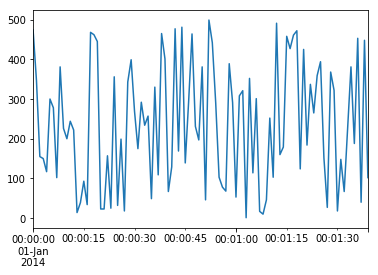

In [118]:
ts.plot()

In [119]:
def randwalk(startdate,points):
    ts = pd.Series(np.random.randn(points), index=pd.date_range(startdate, periods=points))
    ts=ts.cumsum()
    ts.plot()
    return(ts)

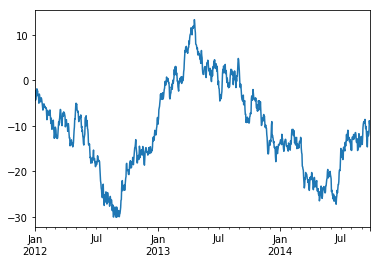

In [120]:
# Using pandas to make a simple random walker by repeatedly running:
a=randwalk('1/1/2012',1000)

In [121]:
# Pandas plot function will print with labels as default

<Figure size 432x288 with 0 Axes>

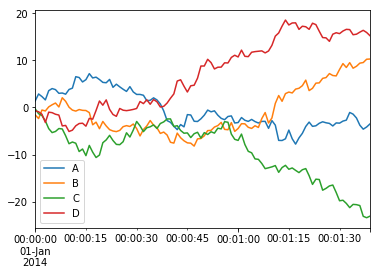

In [122]:
df = pd.DataFrame(np.random.randn(100, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure();df.plot();plt.legend(loc='best') #

### I/O
I/O is straightforward with, for example, pd.read_csv or df.to_csv

### Pandas practical Example

# Next Steps

**Recommended Resources**

Name | Description
--- | ---
[Official Pandas Tutorials](http://pandas.pydata.org/pandas-docs/stable/tutorials.html) | Wes & Company's selection of tutorials and lectures
[Julia Evans Pandas Cookbook](https://github.com/jvns/pandas-cookbook) | Great resource with examples from weather, bikes and 311 calls
[Learn Pandas Tutorials](https://bitbucket.org/hrojas/learn-pandas) | A great series of Pandas tutorials from Dave Rojas
[Research Computing Python Data PYNBs](https://github.com/ResearchComputing/Meetup-Fall-2013/tree/master/python) | A super awesome set of python notebooks from a meetup-based course exclusively devoted to pandas